# 3 Drell-Yan Event Generator with VEGAS
Consider the Drell-Yan production process at an electron-positron collider, in which an electron and positron
collide to produce a virtual photon or a Z boson that then decays into a muon-antimuon pair,
$e^+e^- \rightarrow Z/\gamma \rightarrow \mu^+\mu^-$. As described in lecture and in Ref. [5], the differential cross section for center-of-mass energy $E_{CM} = \sqrt{\hat{s}}$ and scattering angle $\theta$ is given by

$$\frac{d\sigma}{d\Omega}(\hat{s}, \cos \theta) = \frac{\alpha^2}{4\hat{s}} \left[ A_0(\hat{s})(1 + \cos^2\theta) + A_1(\hat{s}) \cos \theta \right],$$

Where $A_0$ and $A_1$ are given by

$$
A_0(\hat{s}) = Q_e^2 - 2Q_eV_\mu V_e \chi_1(\hat{s}) + (A_\mu^2 + V_\mu^2)(A_e^2 + V_e^2) \chi_2(\hat{s}),
$$

$$
A_1(\hat{s}) = -4Q_eA_\mu A_e \chi_1(\hat{s}) + 8A_\mu V_\mu A_e V_e \chi_2(\hat{s}),
$$

and the $\chi_1$ and $\chi_2$ are given by

$$
\chi_1(\hat{s}) = \frac{\kappa\hat{s}(\hat{s} - M_Z^2)}{(\hat{s} - M_Z^2)^2 + \Gamma_Z^2 M_Z^2},
$$

$$
\chi_2(\hat{s}) = \frac{\kappa^2 \hat{s}^2}{(\hat{s} - M_Z^2)^2 + \Gamma_Z^2 M_Z^2},
$$

$$
\kappa = \frac{\sqrt{2}G_F M_Z^2}{4\pi\alpha}.
$$

Useful constants are given in the tables below.

| Fermions        | $Q_f$ | $V_f$                                | $A_f$ |
|-----------------|-------|--------------------------------------|-------|
| $u, c, t$       | $+\frac{2}{3}$ | $\left(+\frac{1}{2} - \frac{4}{3}\sin^2\theta_W\right)$ | $+\frac{1}{2}$ |
| $d, s, b$       | $-\frac{1}{3}$ | $\left(-\frac{1}{2} - \frac{2}{3}\sin^2\theta_W\right)$ | $-\frac{1}{2}$ |
| $\nu_e, \nu_\mu, \nu_\tau$ | $0$ | $\frac{1}{2}$ | $+\frac{1}{2}$ |
| $e, \mu, \tau$  | $-1$ | $\left(-\frac{1}{2} + 2\sin^2\theta_W\right)$ | $-\frac{1}{2}$ |

| Variable                | Symbol            | Value                                                   |
|-------------------------|-------------------|---------------------------------------------------------|
| conversion factor       | $GeV−2 ↔ pb$      | $3.894 \times 10^8 \, \text{pb} = 1 \, \text{GeV}^{-2}$ |
| Z boson mass            | $M_Z$             | $91.188 \, \text{GeV}$                                  |
| Z boson width           | $\Gamma_Z$        | $2.4414 \, \text{GeV}$                                  |
| QED running coupling    | $\alpha$          | $\frac{1}{132.507}$                                     |
| Fermi constant          | $G_F$             | $1.16639 \times 10^{-5} \, \text{GeV}^{-2}$             |
| Weinberg angle          | $\sin^2\theta_W$  | $0.222246$                                              |

In [1]:
# import the required libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
cf = 3.894e+8 #pb per GeV^-2
Mz = 91.188 # GeV --> Z boson mass
Gz = 2.4414 # GeV  --> Gamma_Z=Z boson width
alpha= 1/(132.507)
Gf = 1.16639e-5 # GeV^-2
Wtheta = 0.222246 # Weinberg angle
kappa = np.sqrt(2)*Gf*(Mz**2)/(4*np.pi*alpha)

Qe = -1
Vmu= -0.5 + 2*(Wtheta)
Ve = -0.5 + 2*(Wtheta)
Amu= -0.5
Ae = -0.5

XMIN = 10
XMAX = 200
YMIN = -1
YMAX = 1

In [3]:
def chi1(s):
    # s = np.array(s)
    num = kappa*s*(s-Mz**2)
    den = (s-Mz**2)**2 + (Gz**2)*(Mz**2)
    return num/den
def chi2(s):
    # s = np.array(s)
    num = (kappa**2)*(s**2)
    den = (s-Mz**2)**2 + (Gz**2)*(Mz**2)
    return num/den

def A0(s):
    # s = np.array(s)
    return Qe**2 - 2*Qe*Vmu*Ve*chi1(s) + (Amu**2 + Vmu**2)*(Ae**2 + Ve**2)*chi2(s)

def A1(s):
    # s = np.array(s)
    return - 4*Qe*Amu*Ae*chi1(s) + 8*Amu*Vmu*Ae*Ve*chi2(s)

# option to calculate the cross section using the standard model, where the Z boson is present, or with QED where there is no Z boson
def cross_section(E,cost, method='SM'):
    s = np.array(E**2)
    cost = np.array(cost)
    const = (alpha**2)/(4*s)
    if method=='SM':
        return const*(A0(s)*(1+cost**2) + A1(s)*cost)*cf # multiply by the conversion factor to convert to pb
    elif method=='QED':
        return const*(1+cost**2)*cf # multiply by the conversion factor to convert to pb

In [4]:
cross_section(XMIN,1)

109.90384595557816

In [6]:
cross_section(Mz,1)

262.5864429837076

In [7]:
cross_section(40,1)

5.778208617525939

In [8]:
E=np.linspace(XMIN,XMAX,1000)
cost=np.linspace(-1,1,1000)

# To find max value we initially did a nested for loop
# fvals=[]
# for si in s:
#     for costi in cost:
#         fvals.append(cross_section(si,costi))
# F_VAL_MAX = np.max(fvals)

# Then we tried looking at the smallest energies
# s2=np.linspace(100,500,1000)
# fvals=[]
# for si in s2:
#     for costi in cost:
#         fvals.append(cross_section(si,costi))
# F_VAL_MAX = np.max(fvals)

# But this maximum value was way below the maximum value for the nested for loop

# So we tried to find the maximum value around the resonance point at the Mass of the Z boson (squared)
fvals=[]
for costi in cost:
    fvals.append(cross_section(Mz,costi,method='SM'))
F_VAL_MAX = np.max(fvals)
FMAX2 = np.max(cross_section(E,1,method='QED'))

In [9]:
print('maximum for the Standard Model is: ' +str(round(F_VAL_MAX,3))+'pb')

maximum for the Standard Model is: 262.586pb


In [10]:
print('maximum for the QED is: ' +str(round(FMAX2,3))+'pb')

maximum for the QED is: 110.889pb


## Acceptance-rejection Method
Now, we define the standard acceptance-rejection method.

In [13]:
def brute_force(nPoints, seed=None, method='SM'):
    err=0
    if method=='SM':
        F_MAX=F_VAL_MAX
    elif method=='QED':
        F_MAX=FMAX2
    errs=0
    nFunctionEval = 0
    yy1_rej_method = []
    yy2_rej_method = []
    maxWeightEncounteredRej = -1.0e20
    generator = np.random.RandomState(seed=seed)
    while len(yy1_rej_method) < nPoints:
        rr = generator.uniform(size=3)
        yy1, yy2 = XMIN + rr[0] * (XMAX - XMIN), YMIN + rr[1] * (YMAX - YMIN)
        nFunctionEval += 1
        f_val = cross_section(yy1, yy2, method=method)
        if f_val > maxWeightEncounteredRej:
            maxWeightEncounteredRej = f_val
        if f_val > F_MAX:
            errs+=1
            print(
                f" f_val={f_val} exceeds F_VAL_MAX={F_MAX}, program will now exit. Error number {errs}"
            )
            exit(99)
        if (f_val / F_MAX) > rr[2]:
            yy1_rej_method.append(yy1)
            yy2_rej_method.append(yy2)
    return {"yy1": yy1_rej_method,
        "yy2": yy2_rej_method,
        "nFunEval": nFunctionEval,
        "maxWeightEncountered": maxWeightEncounteredRej}

## Vegas Method

In [14]:
def setup_intervals(NN=100, KK=2000, nIterations=4000, alpha_damp=1.5, seed=None, method='SM'):
    """
    Input:
        NN: Number of intervals in [XMIN, XMAX] or [YMIN, YMAX]
        KK: function evaluations per iteration
        nIterations: number of iterations
        alpha_damp: damping parameter in the Vegas algorithm
    Return:
        Intervals specified by xLow, yLow: each is a 1D numpy array of size NN+1, with
        xLow[0] = 0, xLow[NN] = ym; yLow[0] = 0, yLow[NN] = ym
    """

    # intitial intervals: uniform intervals between XMIN/YMIN and XMAX/YMAX
    xLow = XMIN + (XMAX - XMIN) / NN * np.arange(NN + 1)
    delx = np.ones(NN) * (XMAX - XMIN) / NN
    px = np.ones(NN) / (XMAX - XMIN)  # probability density in each interval
    yLow = YMIN + (YMAX - YMIN) / NN * np.arange(NN + 1)  # YMIN + (YMAX) / NN * np.arange(NN + 1) 
    dely = np.ones(NN) * (YMAX - YMIN) / NN
    py = np.ones(NN) / (YMAX - YMIN)

    generator = np.random.RandomState(seed=seed)
    for _ in range(nIterations):
        ixLow = generator.randint(0, NN, size=KK)
        xx = xLow[ixLow] + delx[ixLow] * generator.uniform(size=KK)
        iyLow = generator.randint(0, NN, size=KK)
        yy = yLow[iyLow] + dely[iyLow] * generator.uniform(size=KK)
        ff = cross_section(xx, yy,method=method)
        f2barx = np.array(
            [sum((ff[ixLow == i] / py[iyLow[ixLow == i]]) ** 2) for i in range(NN)]
        )
        fbarx = np.sqrt(f2barx)
        f2bary = np.array(
            [sum((ff[iyLow == i] / px[ixLow[iyLow == i]]) ** 2) for i in range(NN)]
        )
        fbary = np.sqrt(f2bary)
        fbardelxSum = np.sum(fbarx * delx)
        fbardelySum = np.sum(fbary * dely)
        logArgx = fbarx * delx / fbardelxSum
        logArgy = fbary * dely / fbardelySum
        mmx = KK * pow((logArgx - 1) / np.log(logArgx), alpha_damp)
        mmx = mmx.astype(int)
        mmx = np.where(mmx > 1, mmx, 1)
        mmy = KK * pow((logArgy - 1) / np.log(logArgy), alpha_damp)
        mmy = mmy.astype(int)
        mmy = np.where(mmy > 1, mmy, 1)
        xLowNew = [xLow[i] + np.arange(mmx[i]) * delx[i] / mmx[i] for i in range(NN)]
        xLowNew = np.concatenate(xLowNew, axis=0)
        yLowNew = [yLow[i] + np.arange(mmy[i]) * dely[i] / mmy[i] for i in range(NN)]
        yLowNew = np.concatenate(yLowNew, axis=0)
        nCombx = int(len(xLowNew) / NN)
        nComby = int(len(yLowNew) / NN)
        i = np.arange(NN)
        xLow[:-1] = xLowNew[i * nCombx]
        yLow[:-1] = yLowNew[i * nComby]
        delx = np.diff(xLow)
        dely = np.diff(yLow)
        px = 1.0 / delx / NN
        py = 1.0 / dely / NN

    return xLow, yLow, delx, dely

In [24]:
def vegas(
    nPoints,
    vegasRatioFactor,
    NN=100,
    KK=2000,
    nIterations=4000,
    alpha_damp=1.5,
    seed=None,
    method='SM'
):
    errs=0
    if method=='SM':
        F_MAX=F_VAL_MAX
    elif method=='QED':
        F_MAX=FMAX2
    xLow, yLow, delx, dely = setup_intervals(NN, KK, nIterations, alpha_damp, seed,method=method)
    # vegasRatioMax = vegasRatioFactor * F_VAL_MAX * NN * NN * delx[NN - 2] * dely[NN - 2]  # we wanted to understand where the index NN-2 came from
    # vegasRatioMax = vegasRatioFactor * F_VAL_MAX * NN * NN * np.max(delx) * np.max(dely)  # in lab17 gaussian example, delx[NN-2] is the fourth largest delx
    vegasRatioMax = vegasRatioFactor * F_MAX * NN * NN * np.min(delx) * np.min(dely) # in the original code, delx[NN-2] is the smalles delx (where the maximum occurs)
    nFunctionEval = 0
    yy1_vegas_method = []
    yy2_vegas_method = []
    yy1_vrho_method = []
    yy2_vrho_method = []
    maxWeightEncountered = -1.0e20

    generator = np.random.RandomState(seed=seed)
    while len(yy1_vegas_method) < nPoints:
        ixLow = generator.randint(0, NN)
        xx = xLow[ixLow] + delx[ixLow] * generator.uniform()
        iyLow = generator.randint(0, NN)
        yy = yLow[iyLow] + dely[iyLow] * generator.uniform()
        yy1_vrho_method.append(xx)
        yy2_vrho_method.append(yy)
        nFunctionEval += 1
        f_val = cross_section(xx, yy, method=method)
        ratio = f_val * NN * NN * delx[ixLow] * dely[iyLow]
        if ratio > maxWeightEncountered:
            maxWeightEncountered = ratio
        if ratio > vegasRatioMax:
            errs+=1
            print(
                f"ratio={ratio} exceeds vegasRatioMax={vegasRatioMax}, yy={yy} program will now exit. Error number {errs}"
            )
            exit(99)
        if ratio / vegasRatioMax > generator.uniform():
            yy1_vegas_method.append(xx)
            yy2_vegas_method.append(yy)

    return {
        "yy1vrho": yy1_vrho_method,
        "yy2vrho": yy2_vrho_method,
        "yy1vegas": yy1_vegas_method,
        "yy2vegas": yy2_vegas_method,
        "nFunEval": nFunctionEval,
        "maxWeightEncountered": maxWeightEncountered,
        "vegasRatioMax": vegasRatioMax,
    }

This lego plot will show the function we are trying to integrate.

In [25]:
def lego_plot(xAmplitudes, yAmplitudes, nBins, xLabel, yLabel, title, scale='linear'):
    x = np.array(xAmplitudes)  # turn x,y data into numpy arrays
    y = np.array(yAmplitudes)  # useful for regular matplotlib arrays

    fig = plt.figure(figsize=(9,9))  # create a canvas, tell matplotlib it's 3d
    ax = fig.add_subplot(111, projection="3d")

    # make histograms - set bins
    hist, xedges, yedges = np.histogram2d(x, y, bins=(nBins, nBins))
    xpos, ypos = np.meshgrid(xedges[:-1] + xedges[1:], yedges[:-1] + yedges[1:])

    xpos = xpos.flatten() / 2.0
    ypos = ypos.flatten() / 2.0
    zpos = np.zeros_like(xpos)

    dx = xedges[1] - xedges[0]
    dy = yedges[1] - yedges[0]
    histt = np.transpose(hist) # need to transpose the array for it to take the organization we want when we flatten it
    dz = histt.flatten()
    dzlog = [np.log10(dzi) if dzi>=1 else 0 for dzi in dz]

    # cmap = mpl.colormaps.jet
    cmap = mpl.colormaps["jet"]
    max_height = np.max(dz)  # get range of colorbars so we can normalize
    min_height = np.min(dz)
    # scale each z to [0,1], and get their rgb values
    rgba = [cmap((k - min_height) / max_height) for k in dz]


    if scale=='linear':
        ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort="average")
    elif scale=='log':
        ax.bar3d(xpos, ypos, zpos, dx, dy, dzlog, color=rgba, zsort="average")
    plt.title(title)
    plt.xlabel(xLabel, fontsize=18)
    plt.ylabel(yLabel, fontsize=18)
    plt.xlim(XMIN, XMAX)
    plt.ylim(YMIN, YMAX)
    plt.show()

In [17]:
def _get_colors(hist):
    cmap = mpl.cm.jet
    max_height = np.max(hist)
    min_height = np.min(hist)
    rgba = [cmap((k - min_height) / max_height) for k in hist]
    return rgba

def lego_plot2d(xAmplitudes, yAmplitudes, nBins, xLabel, yLabel, title, scale='linear'):
    x = np.array(xAmplitudes)
    y = np.array(yAmplitudes)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    xhist, xedges = np.histogram(x, bins=nBins)
    xpos = (xedges[:-1] + xedges[1:]) / 2
    if scale=='linear':
        axes[0].bar(xpos, xhist, width=np.diff(xedges), color=_get_colors(xhist), alpha=0.7)
    elif scale=='log':
        axes[0].bar(xpos, np.log10(xhist), width=np.diff(xedges), color=_get_colors(xhist), alpha=0.7)
    
    yhist, yedges = np.histogram(y, bins=nBins)
    ypos = (yedges[:-1] + yedges[1:]) / 2
    axes[1].bar(ypos, yhist, width=np.diff(yedges), color=_get_colors(yhist), alpha=0.7)

    axes[0].set_xlabel(xLabel, fontsize=18)
    # axes[0].set_ylabel('Frequency')
    # axes[0].set_title(title + ' - E_{cm}')

    axes[1].set_xlabel(yLabel, fontsize=18)
    # axes[1].set_ylabel('Frequency')
    # axes[1].set_title(title + ' - Y Amplitudes')

    plt.tight_layout()
    plt.show()

Run both algorithms and compare results

In [18]:
def plot_results(
    nPoints,
    vegasRatioFactor,
    nBins=50,
    NN=100,
    KK=2000,
    nIterations=4000,
    alpha_damp=1.5,
    seed=None,
    method='SM',
    scale='linear',
    histtype='3d'
):
    bf = brute_force(nPoints, seed,method=method)
    vg = vegas(nPoints, vegasRatioFactor, NN, KK, nIterations, alpha_damp, seed,method=method)
    # brute force
    titleRej = r"Acceptance-rejection Method $f(x,y)$"
    if histtype=='3d':
        lego_plot(bf["yy1"], bf["yy2"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$", titleRej,scale=scale)
    elif histtype=='2d':
        lego_plot2d(bf["yy1"], bf["yy2"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$", titleRej,scale=scale)
    plt.show()

    # Vegas method
    titleVrho = r"Vegas Method $p(x,y)$"
    if histtype=='3d':
        lego_plot(vg["yy1vrho"], vg["yy2vrho"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$", titleVrho,scale=scale)
    elif histtype=='2d':
        lego_plot2d(vg["yy1vrho"], vg["yy2vrho"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$", titleVrho,scale=scale)
    plt.show()

    titleVegas = r"Vegas Method $f(x,y)$"
    if histtype=='3d':
        lego_plot(vg["yy1vegas"], vg["yy2vegas"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$", titleVegas,scale=scale)
    elif histtype=='2d':
        lego_plot2d(vg["yy1vegas"], vg["yy2vegas"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$", titleVegas,scale=scale)
    plt.show()

    print(
        f"Acceptance-rejection method nPoints={nPoints}, nFunctionEval={bf['nFunEval']}, maxWeightEncounteredRej={bf['maxWeightEncountered']}, F_VAL_MAX={F_VAL_MAX}"
    )
    print(
        f"Vegas method nPoints={nPoints}, nFunctionEval={vg['nFunEval']}, maxWeightEncountered={vg['maxWeightEncountered']}, vegasRatioMax={vg['vegasRatioMax']}, vegasRatioFactor={vegasRatioFactor}"
    )

In [19]:
def plot_results2(
    nPoints,
    vegasRatioFactor,
    bf,
    vg,
    nBins=50,
    scale='linear',
    histtype='3d'
):

    # brute force
    titleRej = r"Acceptance-rejection Method $f(x,y)$"
    if histtype=='3d':
        lego_plot(bf["yy1"], bf["yy2"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$", titleRej,scale=scale)
    elif histtype=='2d':
        lego_plot2d(bf["yy1"], bf["yy2"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$", titleRej,scale=scale)
    plt.show()

    # Vegas method
    titleVrho = r"Vegas Method $p(x,y)$"
    if histtype=='3d':
        lego_plot(vg["yy1vrho"], vg["yy2vrho"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$", titleVrho,scale=scale)
    elif histtype=='2d':
        lego_plot2d(vg["yy1vrho"], vg["yy2vrho"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$", titleVrho,scale=scale)
    plt.show()

    titleVegas = r"Vegas Method $f(x,y)$"
    if histtype=='3d':
        lego_plot(vg["yy1vegas"], vg["yy2vegas"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$", titleVegas,scale=scale)
    elif histtype=='2d':
        lego_plot2d(vg["yy1vegas"], vg["yy2vegas"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$", titleVegas,scale=scale)
    plt.show()

    print(
        f"Acceptance-rejection method nPoints={nPoints}, nFunctionEval={bf['nFunEval']}, maxWeightEncounteredRej={bf['maxWeightEncountered']}, F_VAL_MAX={F_VAL_MAX}"
    )
    print(
        f"Vegas method nPoints={nPoints}, nFunctionEval={vg['nFunEval']}, maxWeightEncountered={vg['maxWeightEncountered']}, vegasRatioMax={vg['vegasRatioMax']}, vegasRatioFactor={vegasRatioFactor}"
    )

First run the brute force and the vegas methods:

In [26]:
nPoints=10000
vegasRatioFactor=6
nBins=50
NN=100
KK=2000
nIterations=4000
alpha_damp=1.5
seed=None
method='SM'

bf = brute_force(nPoints, seed,method=method)
vg = vegas(nPoints, vegasRatioFactor, NN, KK, nIterations, alpha_damp, seed,method=method)

ratio=16786.0402540948 exceeds vegasRatioMax=16430.80283368744, yy=0.9903116794130931 program will now exit. Error number 1
ratio=17889.14933882558 exceeds vegasRatioMax=16430.80283368744, yy=0.9924993410400234 program will now exit. Error number 2


First plot in 2D for quick good visualization

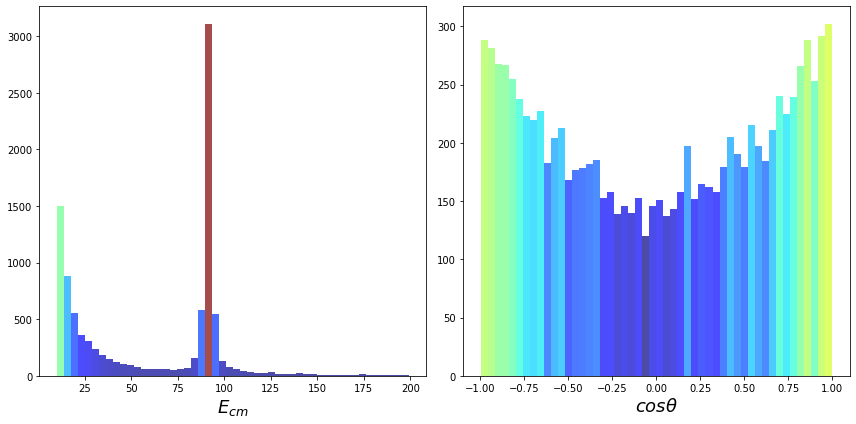

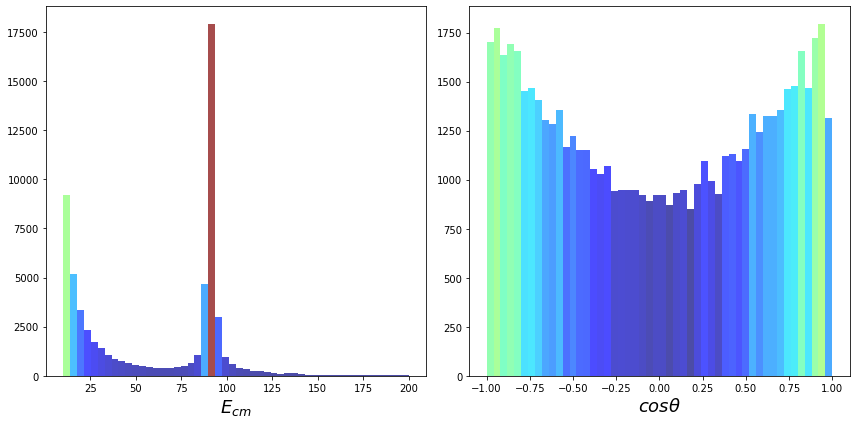

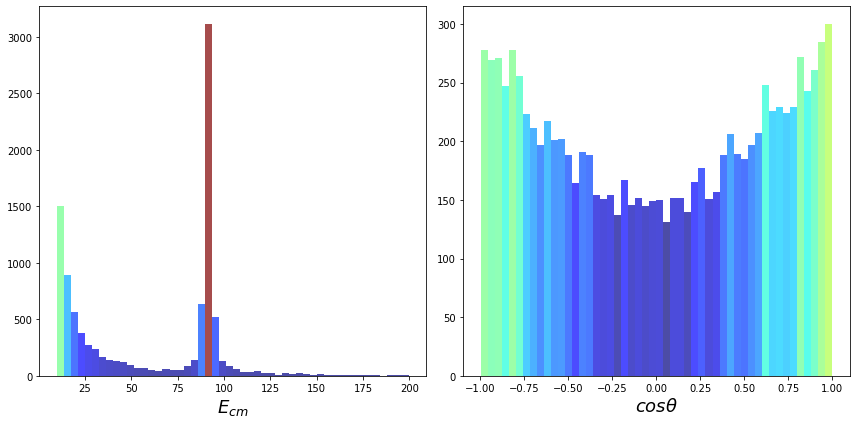

Acceptance-rejection method nPoints=100000, nFunctionEval=371569, maxWeightEncounteredRej=261.80323323874165, F_VAL_MAX=262.5864429837076
Vegas method nPoints=100000, nFunctionEval=61596, maxWeightEncountered=17889.14933882558, vegasRatioMax=16430.80283368744, vegasRatioFactor=0.1


In [27]:
plot_results2(100_000, 0.1,bf,vg,histtype='2d')

We van also plot the Energy plot in log scale

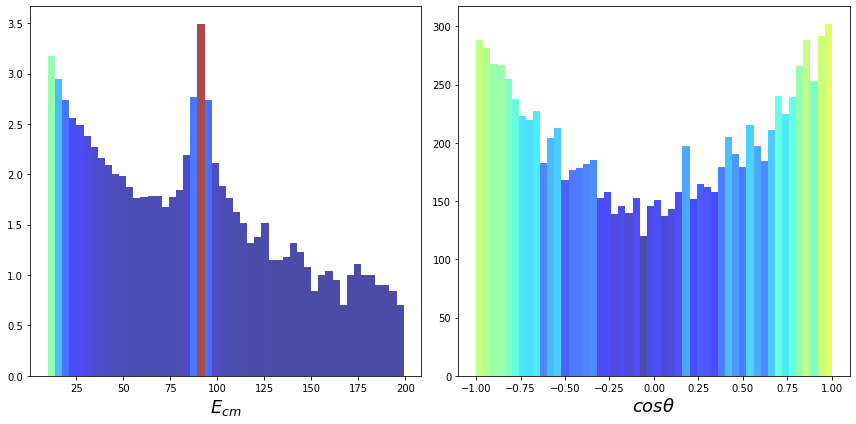

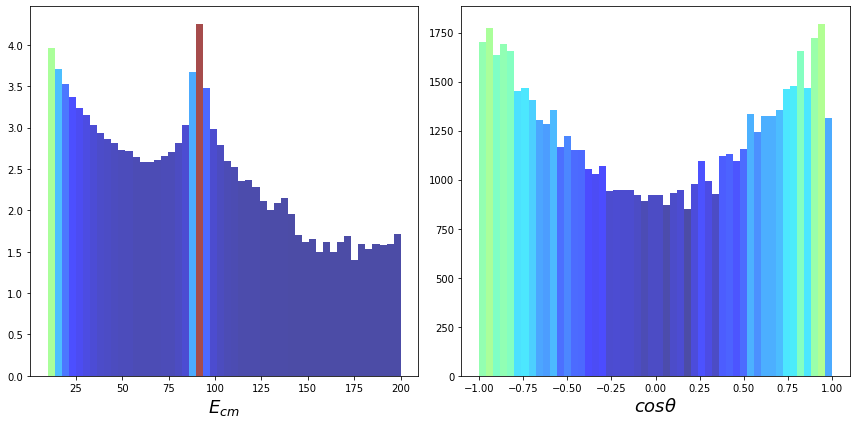

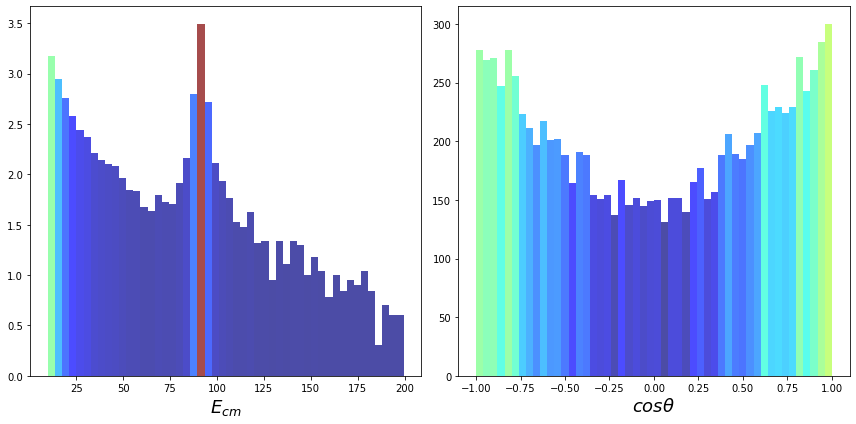

Acceptance-rejection method nPoints=100000, nFunctionEval=371569, maxWeightEncounteredRej=261.80323323874165, F_VAL_MAX=262.5864429837076
Vegas method nPoints=100000, nFunctionEval=61596, maxWeightEncountered=17889.14933882558, vegasRatioMax=16430.80283368744, vegasRatioFactor=0.1


In [28]:
plot_results2(100_000, 0.1,bf,vg,scale='log',histtype='2d')

Now what we'va all been waiting for:

In 3D

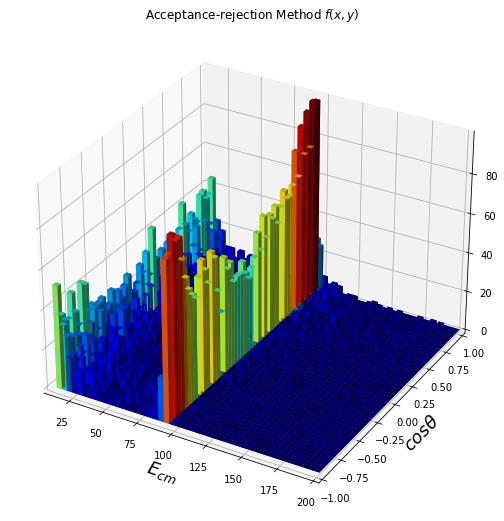

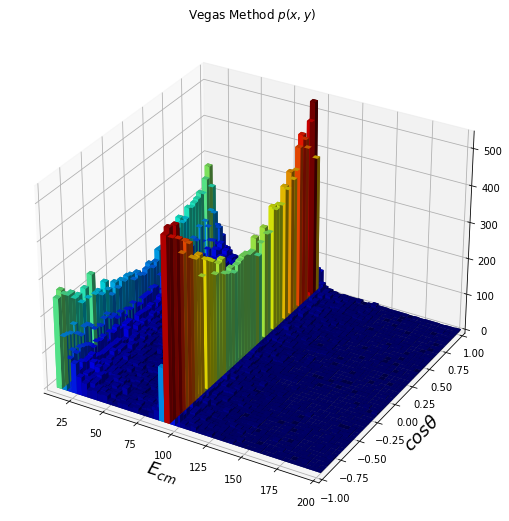

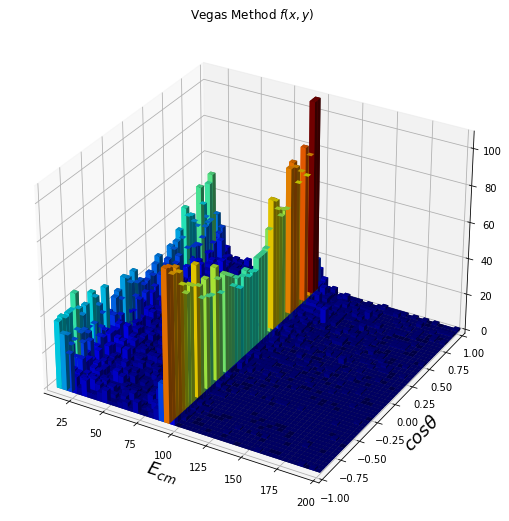

Acceptance-rejection method nPoints=100000, nFunctionEval=371569, maxWeightEncounteredRej=261.80323323874165, F_VAL_MAX=262.5864429837076
Vegas method nPoints=100000, nFunctionEval=61596, maxWeightEncountered=17889.14933882558, vegasRatioMax=16430.80283368744, vegasRatioFactor=0.1


In [29]:
plot_results2(100_000, 0.1, bf,vg)

And in log scale

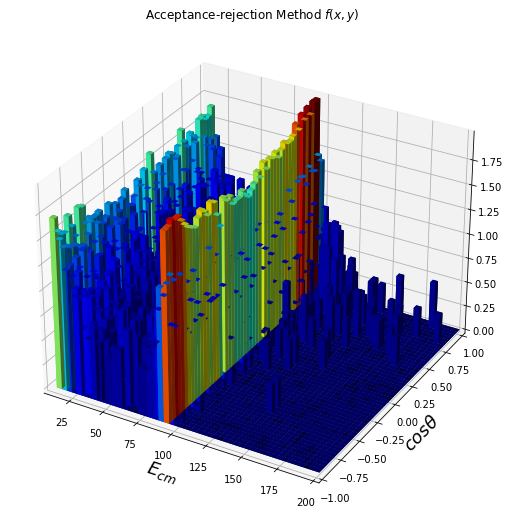

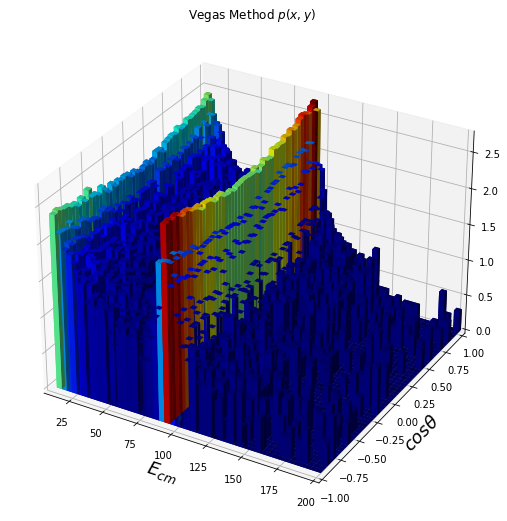

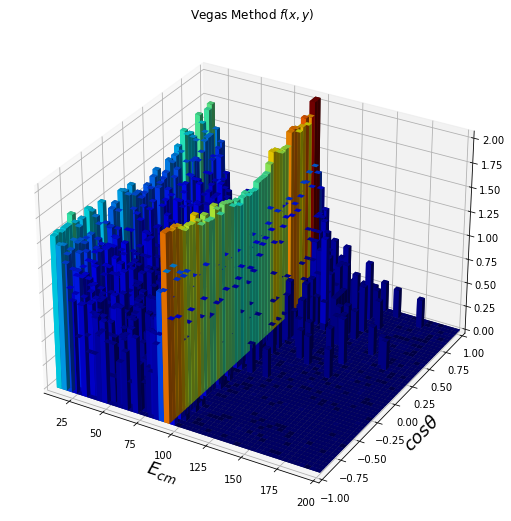

Acceptance-rejection method nPoints=100000, nFunctionEval=371569, maxWeightEncounteredRej=261.80323323874165, F_VAL_MAX=262.5864429837076
Vegas method nPoints=100000, nFunctionEval=61596, maxWeightEncountered=17889.14933882558, vegasRatioMax=16430.80283368744, vegasRatioFactor=0.1


In [30]:
plot_results2(100_000, 0.1,bf,vg,scale='log')

In [31]:
def bindist(xAmplitudes, yAmplitudes, nBins, xLabel, yLabel):
    x = np.array(xAmplitudes)
    y = np.array(yAmplitudes)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    xhist, xedges = np.histogram(x, bins=nBins)
    xpos = (xedges[:-1] + xedges[1:]) / 2
    # normalized cummulative hist
    xhist = np.cumsum(xhist)
    xhist = xhist/xhist[-1]
    axes[0].plot(xpos, xhist, linewidth=4, color='b')
    # vertical line at x=Mz
    axes[0].axvline(x=Mz, color='k', linestyle='--', label='Z boson mass', linewidth=2)

    
    yhist, yedges = np.histogram(y, bins=nBins)
    ypos = (yedges[:-1] + yedges[1:]) / 2
    # normalized cummulative hist
    yhist = np.cumsum(yhist)
    yhist = yhist/yhist[-1]
    axes[1].plot(ypos, yhist, linewidth=4, color='r')

    axes[0].set_xlabel(xLabel, fontsize=18)
    axes[0].set_ylabel('Cumulative Bins Distribution')
    axes[0].legend(fontsize=12)
    axes[1].set_xlabel(yLabel, fontsize=18)
    axes[1].set_ylabel('Bins Distribution')

    plt.tight_layout()
    plt.show()

In [32]:
def plot_bindist(method,
    nBins=50):

    # brute force
    titleRej = r"Acceptance-rejection Method $f(x,y)$"
    bindist(method["yy1"], method["yy2"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$")
    plt.show()


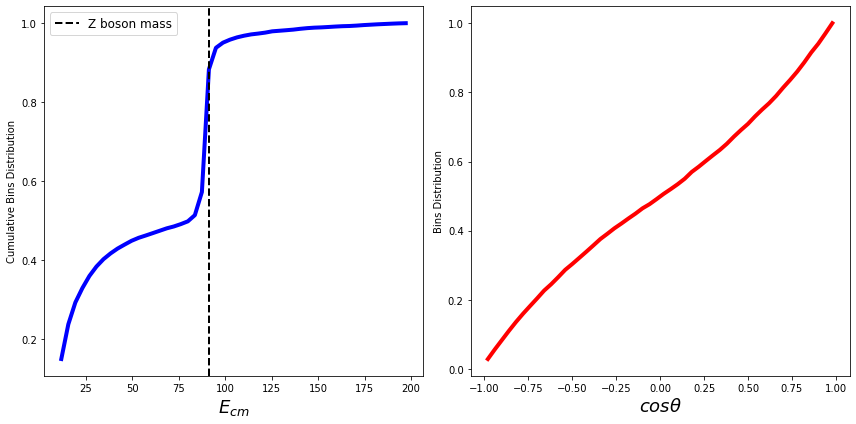

In [33]:
plot_bindist(bf)

# Hyperparameter tuning

In [34]:
def plot_results3(
    vg,
    nBins=50):
    # Vegas method
    titleVegas = r"Vegas Method $f(x,y)$"
    lego_plot(vg["yy1vegas"], vg["yy2vegas"], nBins, "$E_{cm}$", "$cos$"+r"$\theta$", titleVegas)
    plt.show()

nPoints=1000, nBins=15, alpha_damp=1.5


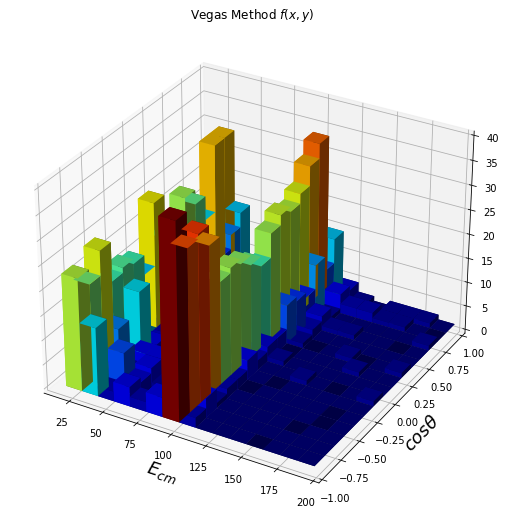

-----------------------------------
-----------------------------------
-----------------------------------
nPoints=1000, nBins=50, alpha_damp=1.5


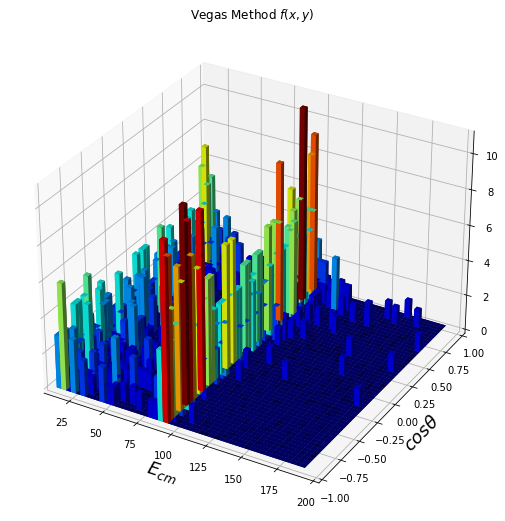

-----------------------------------
-----------------------------------
-----------------------------------
nPoints=1000, nBins=150, alpha_damp=1.5


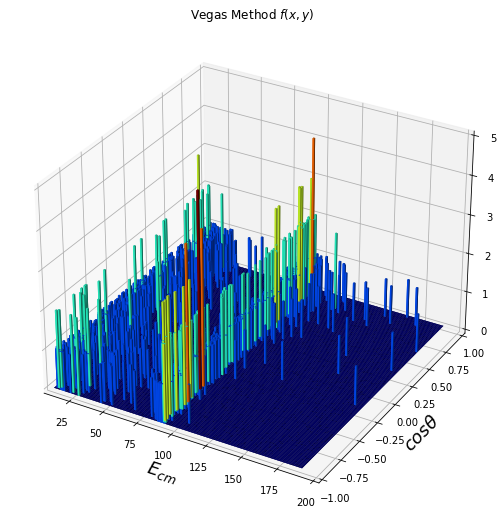

-----------------------------------
-----------------------------------
-----------------------------------
nPoints=1000, nBins=15, alpha_damp=2.5


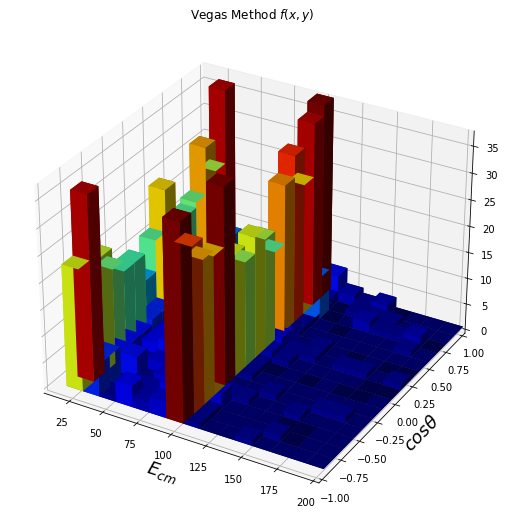

-----------------------------------
-----------------------------------
-----------------------------------
nPoints=1000, nBins=50, alpha_damp=2.5


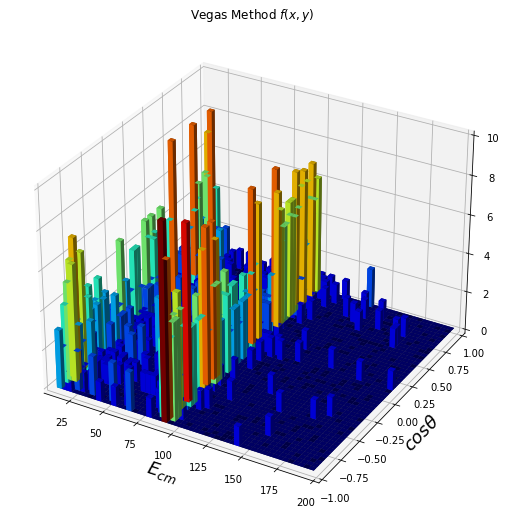

-----------------------------------
-----------------------------------
-----------------------------------
nPoints=1000, nBins=150, alpha_damp=2.5


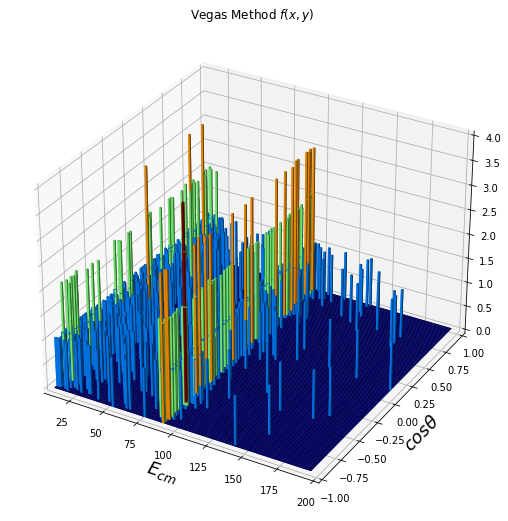

-----------------------------------
-----------------------------------
-----------------------------------
nPoints=10000, nBins=15, alpha_damp=1.5


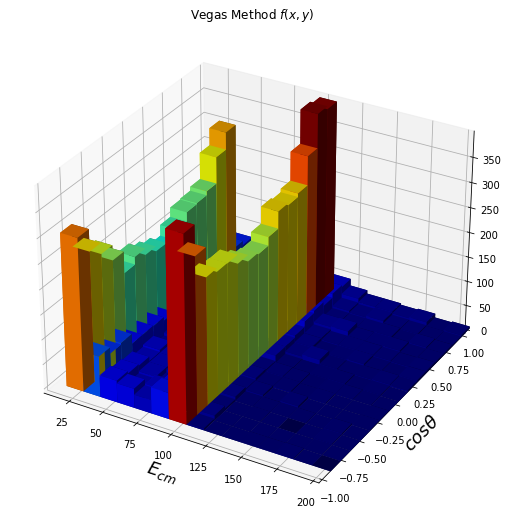

-----------------------------------
-----------------------------------
-----------------------------------
nPoints=10000, nBins=50, alpha_damp=1.5


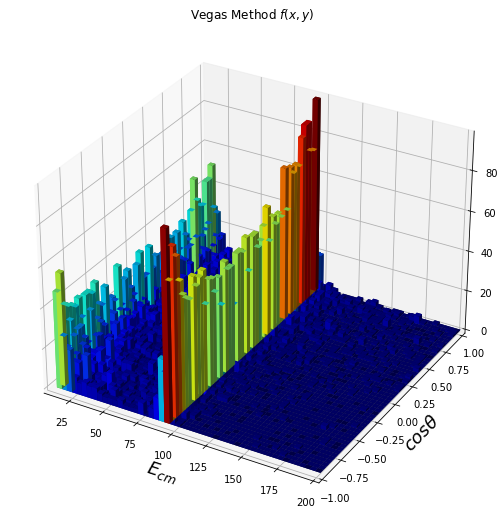

-----------------------------------
-----------------------------------
-----------------------------------
nPoints=10000, nBins=150, alpha_damp=1.5


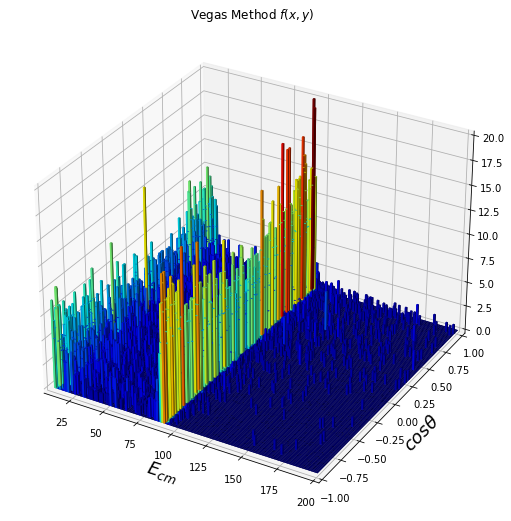

-----------------------------------
-----------------------------------
-----------------------------------
ratio=14927.353374213166 exceeds vegasRatioMax=14868.448550506573, yy=0.8395439717816967 program will now exit. Error number 1
ratio=16419.16294614675 exceeds vegasRatioMax=14868.448550506573, yy=0.9839676495314011 program will now exit. Error number 2
nPoints=10000, nBins=15, alpha_damp=2.5


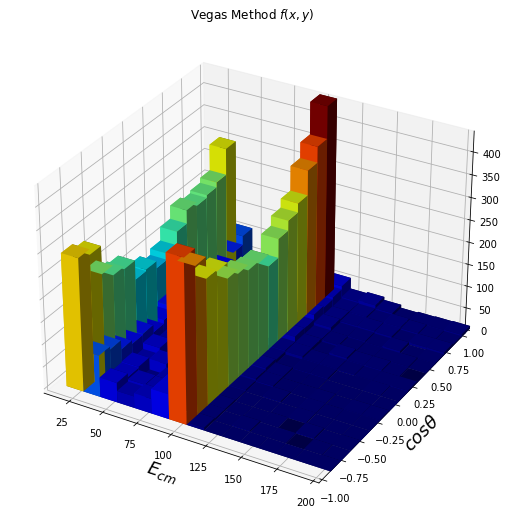

-----------------------------------
-----------------------------------
-----------------------------------
nPoints=10000, nBins=50, alpha_damp=2.5


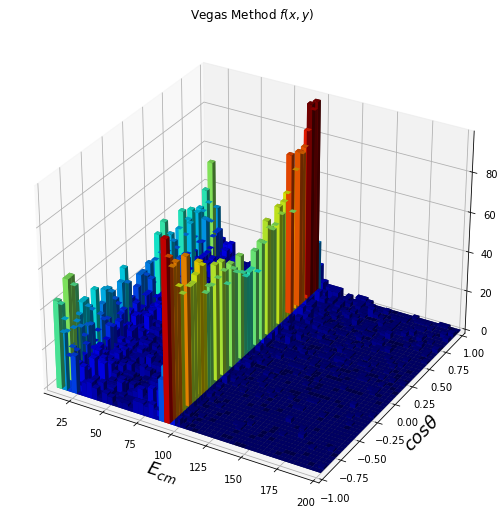

-----------------------------------
-----------------------------------
-----------------------------------
nPoints=10000, nBins=150, alpha_damp=2.5


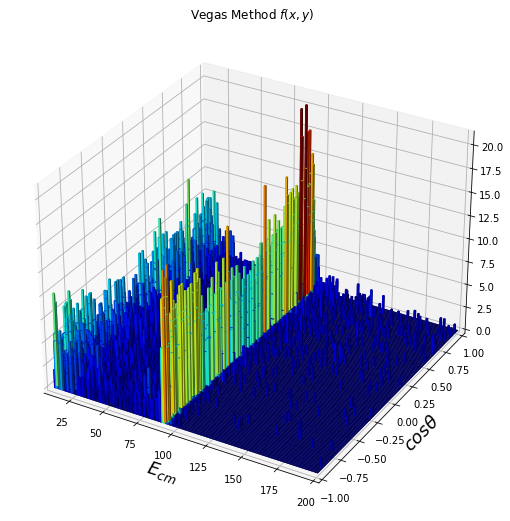

-----------------------------------
-----------------------------------
-----------------------------------
ratio=16280.055661072473 exceeds vegasRatioMax=15899.559721492325, yy=0.9884643267445052 program will now exit. Error number 1
ratio=17086.762361273537 exceeds vegasRatioMax=15899.559721492325, yy=0.9789190779765197 program will now exit. Error number 2
ratio=17966.361353811375 exceeds vegasRatioMax=15899.559721492325, yy=0.9923385005864593 program will now exit. Error number 3
ratio=17528.345976835444 exceeds vegasRatioMax=15899.559721492325, yy=0.9948919886922182 program will now exit. Error number 4
ratio=18319.716128848366 exceeds vegasRatioMax=15899.559721492325, yy=0.9823990674792497 program will now exit. Error number 5
ratio=16350.372787936361 exceeds vegasRatioMax=15899.559721492325, yy=0.9882633188145157 program will now exit. Error number 6
ratio=16199.49873897276 exceeds vegasRatioMax=15899.559721492325, yy=0.9872953922027465 program will now exit. Error number 7
rati

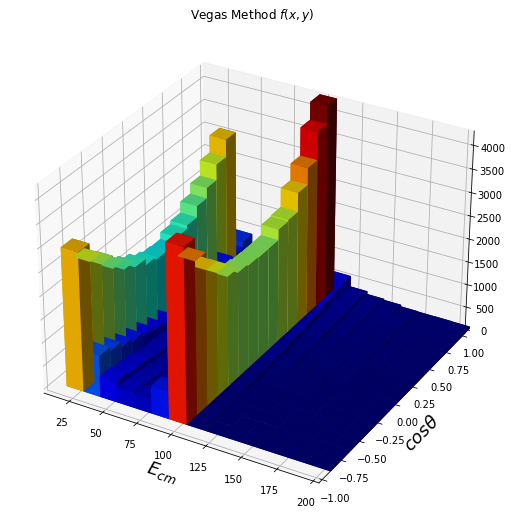

-----------------------------------
-----------------------------------
-----------------------------------
nPoints=100000, nBins=50, alpha_damp=1.5


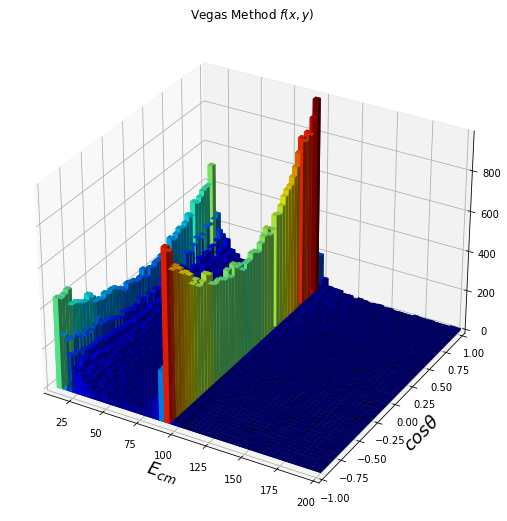

-----------------------------------
-----------------------------------
-----------------------------------
nPoints=100000, nBins=150, alpha_damp=1.5


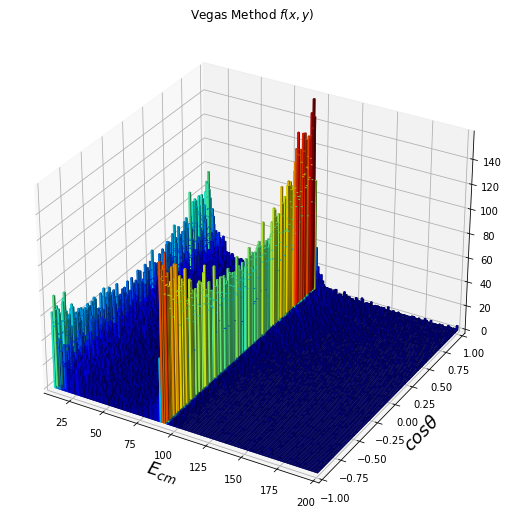

-----------------------------------
-----------------------------------
-----------------------------------
ratio=14180.409135699321 exceeds vegasRatioMax=13241.891522417953, yy=0.960819482042844 program will now exit. Error number 1
ratio=13718.836879220304 exceeds vegasRatioMax=13241.891522417953, yy=0.9673335452613502 program will now exit. Error number 2
ratio=14300.368945814773 exceeds vegasRatioMax=13241.891522417953, yy=0.9792833502103924 program will now exit. Error number 3
ratio=15222.273711794853 exceeds vegasRatioMax=13241.891522417953, yy=0.8654003452666036 program will now exit. Error number 4
ratio=16013.361067884156 exceeds vegasRatioMax=13241.891522417953, yy=0.9886601640763988 program will now exit. Error number 5
ratio=13278.656583536522 exceeds vegasRatioMax=13241.891522417953, yy=0.5665489877261072 program will now exit. Error number 6
ratio=14808.170036508665 exceeds vegasRatioMax=13241.891522417953, yy=0.7289364473674194 program will now exit. Error number 7
rati

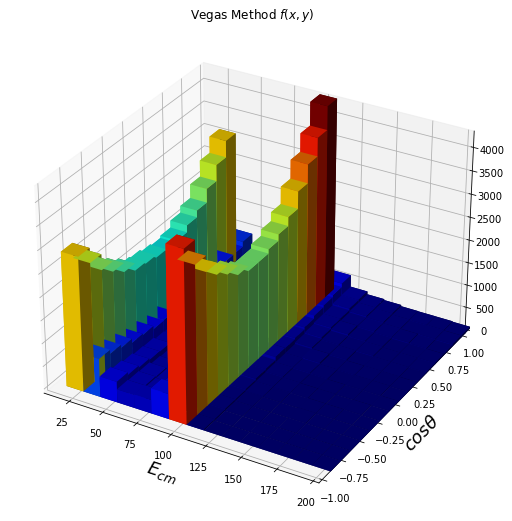

-----------------------------------
-----------------------------------
-----------------------------------
nPoints=100000, nBins=50, alpha_damp=2.5


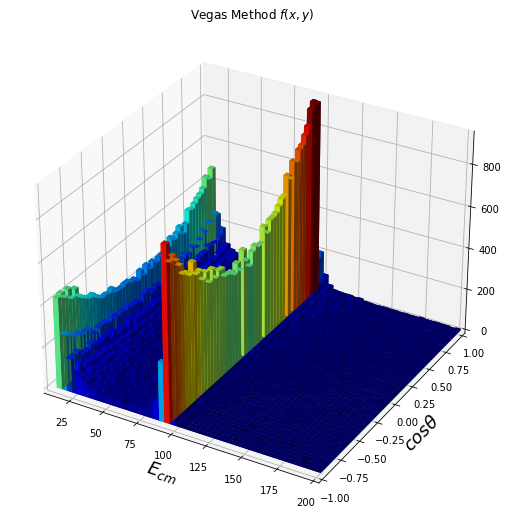

-----------------------------------
-----------------------------------
-----------------------------------
nPoints=100000, nBins=150, alpha_damp=2.5


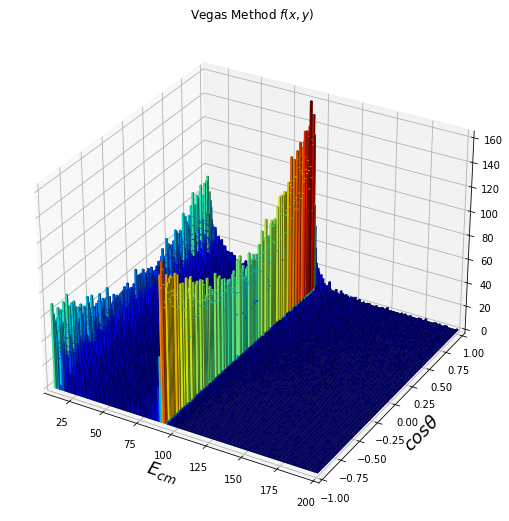

-----------------------------------
-----------------------------------
-----------------------------------


In [35]:
nPoints=[1000,10000,100000]
# nPoints=[1000,10000]
nBins=[15,50,150]
# nBins=[15,50]
alpha_damp=[1.5,2.5]

vegasRatioFactor=6
NN=100
KK=2000
nIterations=4000
seed=None
method='SM'

for nP in nPoints:
    for ad in alpha_damp:
        vg = vegas(nP, vegasRatioFactor, NN, KK, nIterations, ad, seed,method=method)
        for nB in nBins:
            print(f"nPoints={nP}, nBins={nB}, alpha_damp={ad}")
            plot_results3(vg, nBins=nB)
            print('-----------------------------------')
            print('-----------------------------------')
            print('-----------------------------------')

In [36]:
s=np.linspace(XMIN,XMAX,1000)
E=np.linspace(10,200,1000)
s2=E**2

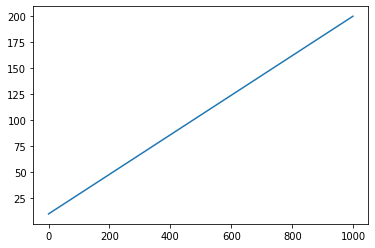

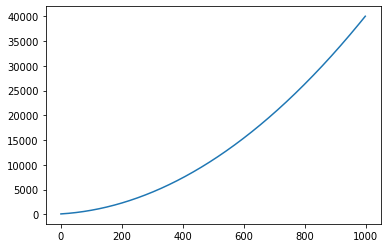

In [37]:
plt.plot(s)
plt.show()
plt.plot(s2)
plt.show()

# Replicate slides

In [55]:
def slides_plot(vg1,vg2):
    x_sm = np.array(vg1["yy1vegas"])
    y_sm = np.array(vg1["yy2vegas"])
    x_qed = np.array(vg2["yy1vegas"])
    y_qed = np.array(vg2["yy2vegas"])

    xhist_sm, xedges_sm = np.histogram(x_sm, bins=50)
    xpos_sm = (xedges_sm[:-1] + xedges_sm[1:]) / 2
    xhist_qed, xedges_qed = np.histogram(x_qed, bins=50)
    xpos_qed = (xedges_qed[:-1] + xedges_qed[1:]) / 2

    yhist_sm, yedges_sm = np.histogram(y_sm, bins=50)
    ypos_sm = (yedges_sm[:-1] + yedges_sm[1:]) / 2
    yhist_qed, yedges_qed = np.histogram(y_qed, bins=50)
    ypos_qed = (yedges_qed[:-1] + yedges_qed[1:]) / 2

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # axes[0].plot(xpos_sm, np.log10(xhist_sm), linewidth=2, color='g', label='SM')
    # y axis in log scale
    axes[0].plot(xpos_sm, xhist_sm, linewidth=2, color='g', label='SM')
    axes[0].plot(xpos_qed, xhist_qed, linewidth=2, color='r', label='QED')
    # the previous plot but with pink x marks
    # axes[0].scatter(xpos_qed, xhist_sm, marker='x', color='pink', s=100, label='SM marks')
    # vertical line at x=Mz
    axes[0].axvline(x=Mz, color='k', linestyle='--', label='Z boson mass', linewidth=2)
    # set the y axis to log scale
    axes[0].set_yscale('log')

    axes[1].plot(ypos_sm, yhist_sm, linewidth=2, color='g', label='SM')
    axes[1].plot(ypos_qed, yhist_qed, linewidth=2, color='r', label='QED')

    axes[0].set_xlabel("$E_{cm}$", fontsize=18)
    axes[0].set_ylabel('$\sigma$ (pb)')
    axes[0].legend(fontsize=12)
    axes[1].set_xlabel("$cos$"+r"$\theta$", fontsize=18)
    axes[1].set_ylabel('$\sigma$ (pb)')
    axes[1].legend(fontsize=12)

    plt.tight_layout()
    plt.show()

In [40]:
nPoints=10_000
vegasRatioFactor=6
NN=100
KK=2000
nIterations=4000
alpha_damp=1.5
seed=None

vg_sm  = vegas(nPoints, vegasRatioFactor, NN, KK, nIterations, alpha_damp, seed,method='SM')
vg_qed = vegas(nPoints, vegasRatioFactor, NN, KK, nIterations, alpha_damp, seed,method='QED')

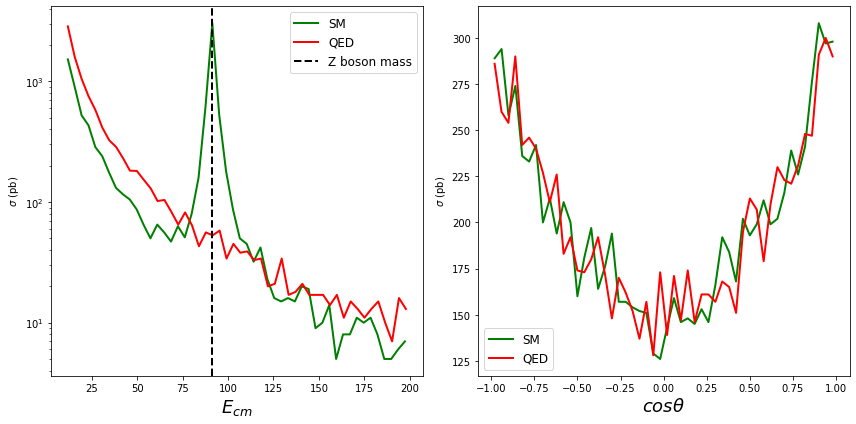

In [56]:
slides_plot(vg_sm,vg_qed)

In [68]:
def sigma (E):
    s = np.array(E**2)
    return 4*np.pi* A0(s)*alpha**2/(3*s)*cf

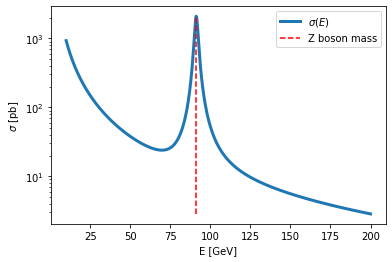

In [71]:
E=np.linspace(10,200,1000)
plt.plot(E,sigma(E),linewidth=3,label='$\sigma(E)$')
plt.vlines(Mz,min(sigma(E)),max(sigma(E)),linestyles='dashed',colors='r',label='Z boson mass')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'$\sigma$ [pb]')
plt.legend()
plt.show()